Internet use and religion in Europe, part five
-----------------------------------------

This notebook presents explorations of the association between Internet use and religion in Europe, using data from the European Social Survey (http://www.europeansocialsurvey.org).

Copyright 2015 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [48]:
from __future__ import print_function, division

import string
import random
import cPickle as pickle

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

import ess

# colors by colorbrewer2.org
RED = '#e41a1c'
BLUE = '#377eb8'
GREEN = '#4daf4a'
PURPLE = '#984ea3'
ORANGE = '#ff7f00'
YELLOW = '#ffff33'
BROWN = '#a65628'
PINK ='#f781bf'

%matplotlib inline

Open the store containing resampled DataFrames.

In [2]:
store = pd.HDFStore('ess.resamples.h5')

Make the country objects

In [59]:
country_map = ess.make_countries(store)

Austria
Belgium
Bulgaria
Switzerland
Cyprus
Czech Rep
Germany
Denmark
Estonia
Spain
Finland
France
UK
Greece
Croatia
Hungary
Ireland
Israel
Iceland
Italy
Lithuania
Luxembourg
Latvia
Netherlands
Norway
Poland
Portugal
Romania
Russia
Sweden
Slovenia
Slovakia
Turkey
Ukraine


For each resampled frame, run both models and store the results in the Country objects

In [60]:
FORMULA1 = ('netuse_f ~ inwyr07_f + yrbrn60_f + yrbrn60_f2 + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + hasrelig_f')

FORMULA2 = ('netuse_f ~ inwyr07_f + yrbrn60_f + yrbrn60_f2 + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + rlgdgr_f')

In [61]:
num = 201
ess.process_all_frames(store, country_map, num, 
                       smf.ols, FORMULA1, 1)

0 /AAVZWa


In [62]:
ess.process_all_frames(store, country_map, num,
                       smf.ols, FORMULA2, 2)

0 /AAVZWa


In [63]:
with open('ess5.pkl', 'wb') as fp:
    pickle.dump(country_map, fp)

In [64]:
with open('ess5.pkl', 'rb') as fp:
    country_map = pickle.load(fp)

In [67]:
plot_counter = 1

def save_plot(flag=False):
    """Saves plots in png format.
    
    flag: boolean, whether to save or not
    """
    global plot_counter
    if flag:
        root = 'ess5.%2.2d' % plot_counter
        thinkplot.Save(root=root, formats=['png'])
        plot_counter += 1

Make a plot showing confidence interval of effect size for the given parameters

In [68]:
xlabel1 = 'Difference in level of Internet use (0-7 scale)'
xlabel2 = 'Difference in level of Internet use (0-7 scale)'

In [74]:
xlim = [-1.0, 3.5]

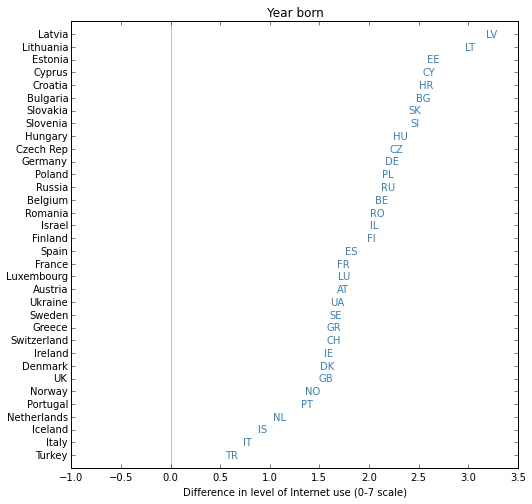

In [75]:
t = ess.extract_ranges(country_map, 'yrbrn60_f', 'hasrelig_f')
ess.plot_cis(t, BLUE)
thinkplot.Config(title='Year born',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

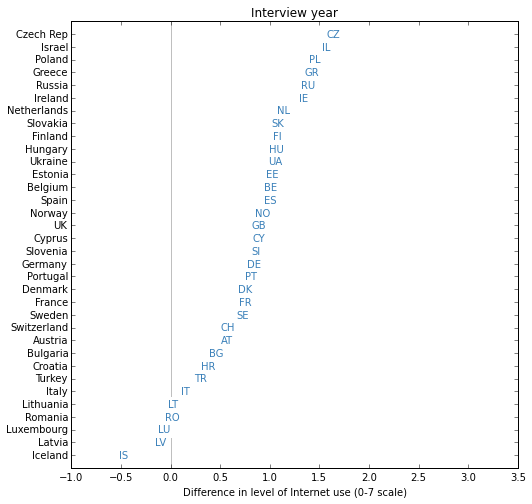

In [76]:
t = ess.extract_ranges(country_map, 'inwyr07_f', 'hasrelig_f')
ess.plot_cis(t, BLUE)
thinkplot.Config(title='Interview year',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

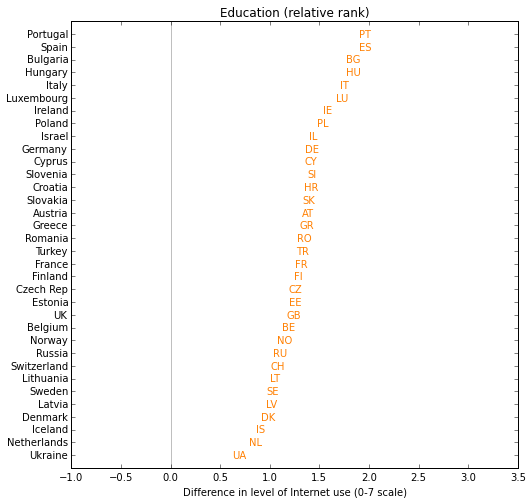

In [77]:
t = ess.extract_ranges(country_map, 'edurank_f', 'hasrelig_f')
ess.plot_cis(t, ORANGE)
thinkplot.Config(title='Education (relative rank)',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

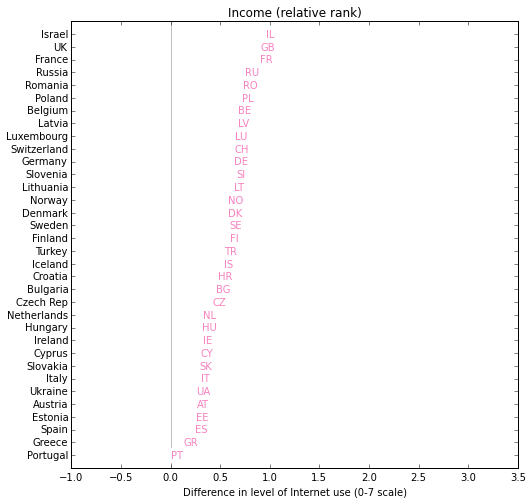

In [78]:
t = ess.extract_ranges(country_map, 'hincrank_f', 'hasrelig_f')
ess.plot_cis(t, PINK)
thinkplot.Config(title='Income (relative rank)',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

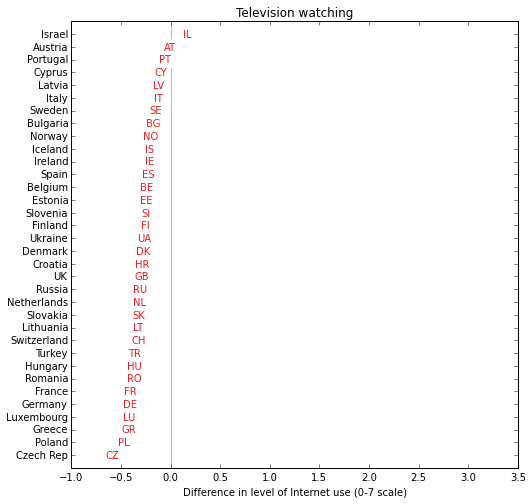

In [79]:
t = ess.extract_ranges(country_map, 'tvtot_f', 'hasrelig_f')
ess.plot_cis(t, RED)
thinkplot.Config(title='Television watching',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

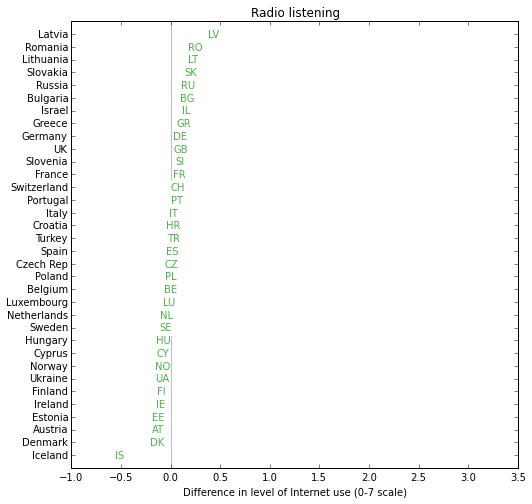

In [80]:
t = ess.extract_ranges(country_map, 'rdtot_f', 'hasrelig_f')
ess.plot_cis(t, GREEN)
thinkplot.Config(title='Radio listening',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

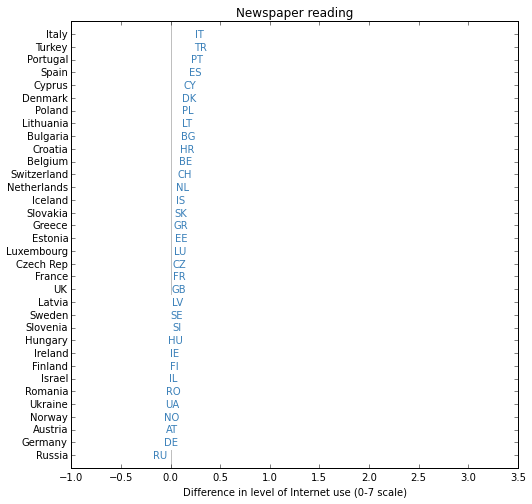

In [81]:
t = ess.extract_ranges(country_map, 'nwsptot_f', 'hasrelig_f')
ess.plot_cis(t, BLUE)
thinkplot.Config(title='Newspaper reading',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

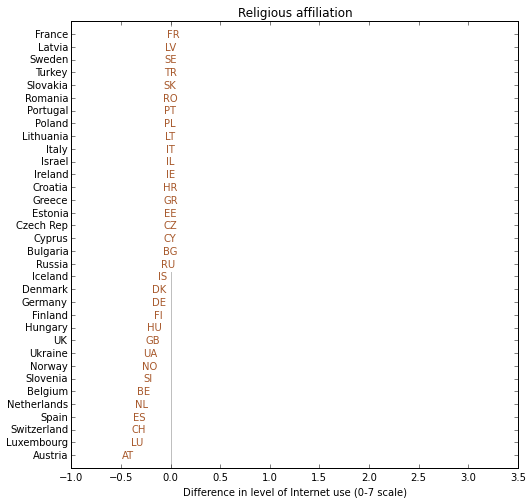

In [82]:
reload(ess)
t = ess.extract_ranges(country_map, 'hasrelig_f', 'hasrelig_f')
ess.plot_cis(t, BROWN)
thinkplot.Config(title='Religious affiliation',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

Plot the CDFs of effect size across countries

In [87]:
country = country_map['DE']
country.get_ranges('hasrelig_f')

array([<ess.Range instance at 0x7fb2acb6fdd0>], dtype=object)

-0.25931646212 -0.269689990794
-0.098237777165 0.0
0.0278575659308 0.0177048512953
0.11027960605 0.0931415858803
0.575125298299 0.599041960863
1.34242049191 1.329158493
0.783538888503 0.858798086379
1.93463078112 1.81918268087


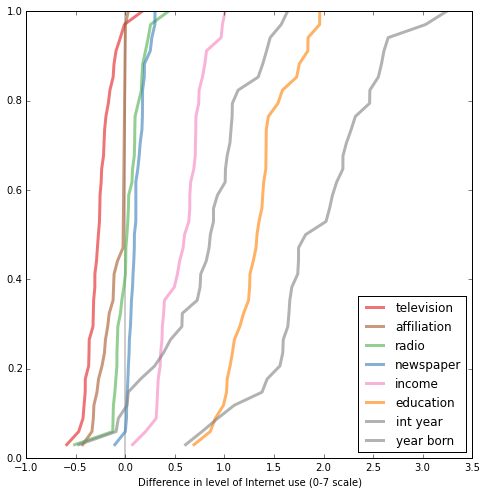

In [89]:
reload(ess)
cdfnames = ['tvtot_f', 'hasrelig_f', 'rdtot_f', 
            'nwsptot_f', 'hincrank_f', 'edurank_f',
            'inwyr07_f', 'yrbrn60_f']
ess.plot_cdfs(country_map, ess.extract_ranges, cdfnames=cdfnames)
thinkplot.Config(xlabel=xlabel1,
                 xlim=xlim,
                 legend=True,
                 loc='lower right')
save_plot()

Make similar figures for the second model.

In [20]:
xlim = [-1.5, 2.5]

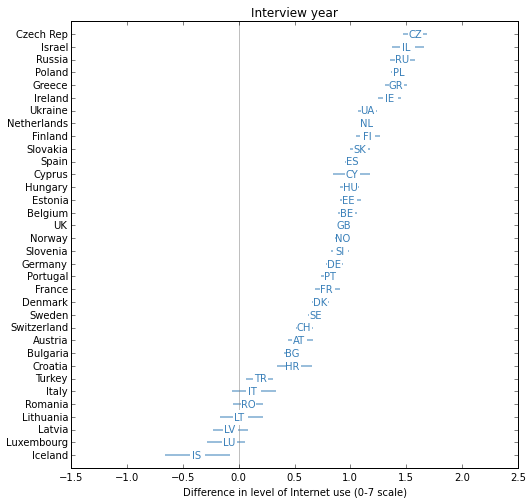

In [21]:
t = ess.extract_ranges2(country_map, 'inwyr07_f', 'hasrelig_f')
ess.plot_cis(t, BLUE)
thinkplot.Config(title='Interview year',
                 xlabel=xlabel2, xlim=xlim)
save_plot()

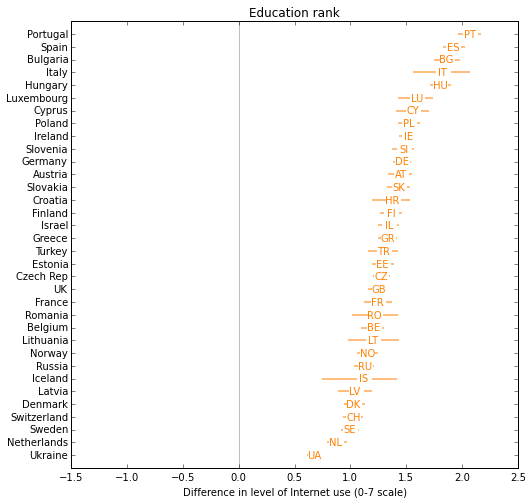

In [22]:
t = ess.extract_ranges2(country_map, 'edurank_f', 'rlgdgr_f')
ess.plot_cis(t, ORANGE)
thinkplot.Config(title='Education rank',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

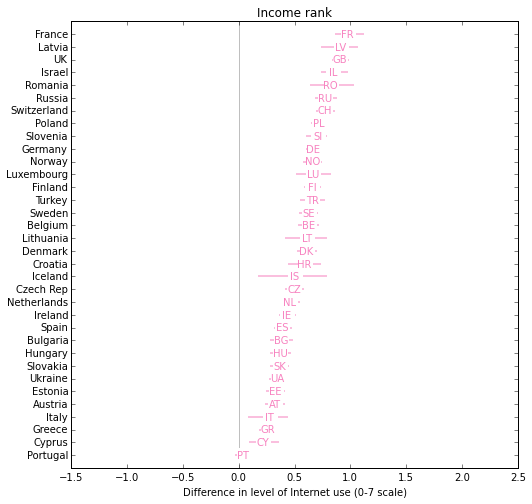

In [23]:
t = ess.extract_ranges2(country_map, 'hincrank_f', 'hasrelig_f')
ess.plot_cis(t, PINK)
thinkplot.Config(title='Income rank',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

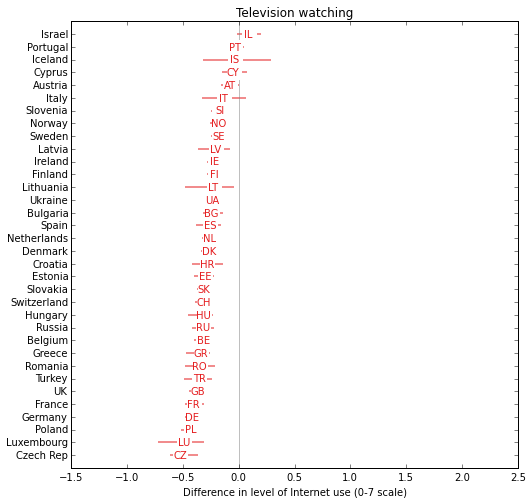

In [24]:
t = ess.extract_ranges2(country_map, 'tvtot_f', 'hasrelig_f')
ess.plot_cis(t, RED)
thinkplot.Config(title='Television watching',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

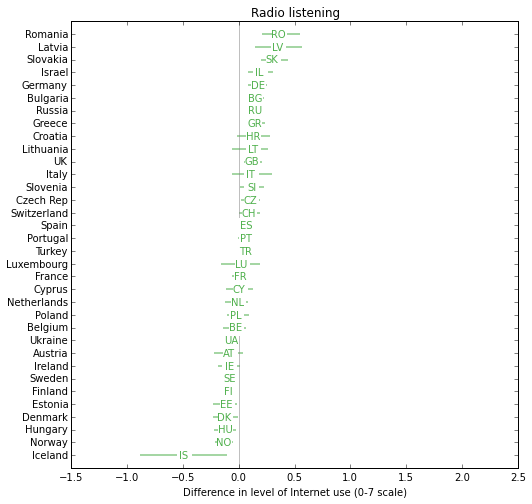

In [25]:
t = ess.extract_ranges2(country_map, 'rdtot_f', 'hasrelig_f')
ess.plot_cis(t, GREEN)
thinkplot.Config(title='Radio listening',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

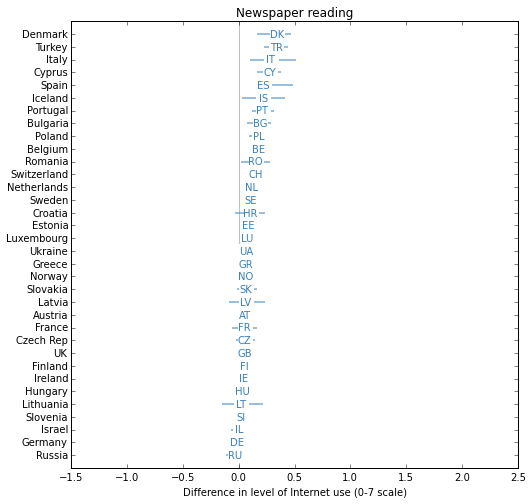

In [26]:
t = ess.extract_ranges2(country_map, 'nwsptot_f', 'hasrelig_f')
ess.plot_cis(t, BLUE)
thinkplot.Config(title='Newspaper reading',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

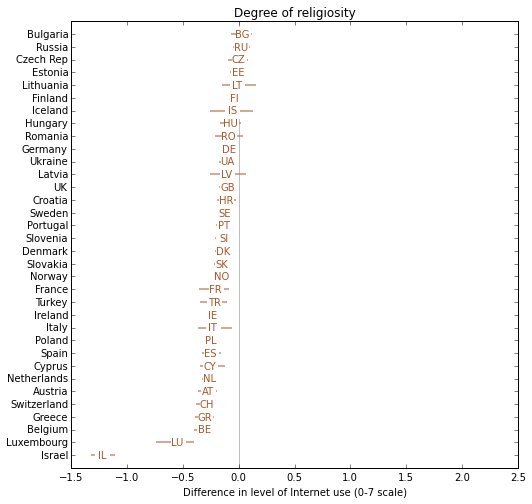

In [27]:
t = ess.extract_ranges2(country_map, 'rlgdgr_f', 'hasrelig_f')
ess.plot_cis(t, BROWN)
thinkplot.Config(title='Degree of religiosity',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

-0.269742927799 -0.272977885274
-0.182812960784 -0.162317847431
0.027841521664 0.0173376057459
0.107988008463 0.101023359689
0.567008824044 0.595285444529
1.32987578032 1.29336007119
0.77888150934 0.856593171833
1.92288271775 1.81516002556


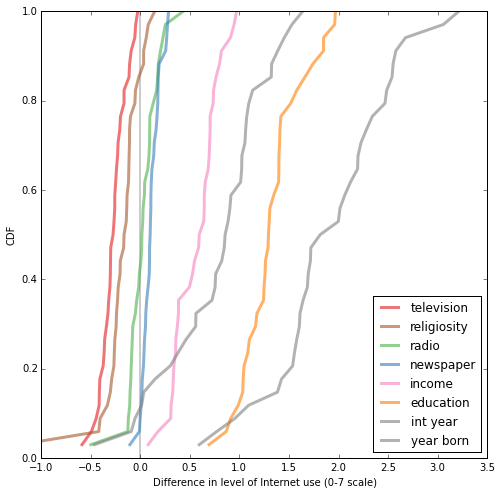

In [91]:
reload(ess)
cdfnames = ['tvtot_f', 'rlgdgr_f', 'rdtot_f', 
            'nwsptot_f', 'hincrank_f', 'edurank_f',
            'inwyr07_f', 'yrbrn60_f']
ess.plot_cdfs(country_map, ess.extract_ranges2, cdfnames=cdfnames)
thinkplot.Config(xlabel=xlabel2,
                 xlim=xlim,
                 ylabel='CDF',
                 loc='lower right')
save_plot()

In [46]:
reload(ess)
varnames = ['inwyr07_f', 'yrbrn60_f', 'hasrelig_f', 'edurank_f', 
            'tvtot_f', 'hincrank_f', 'rdtot_f', 'nwsptot_f']

ts = ess.make_table(country_map, varnames, ess.extract_ranges)
ess.print_table(ts)

varname  	neg*  	neg  	pos  	pos*
---------  	----  	---  	---  	----
tvtot_f  	28  	5  	0  	1  	34
hasrelig_f  	15  	2  	17  	0  	34
rdtot_f  	8  	5  	7  	14  	34
inwyr07_f  	1  	2  	3  	28  	34
yrbrn60_f  	0  	0  	0  	34  	34
edurank_f  	0  	0  	0  	34  	34
hincrank_f  	0  	0  	1  	33  	34
nwsptot_f  	0  	2  	9  	23  	34


In [47]:
varnames = ['inwyr07_f', 'yrbrn60_f', 'rlgdgr_f', 'edurank_f', 
            'tvtot_f', 'hincrank_f', 'rdtot_f', 'nwsptot_f']

ts = ess.make_table(country_map, varnames, ess.extract_ranges2)
ess.print_table(ts)

varname  	neg*  	neg  	pos  	pos*
---------  	----  	---  	---  	----
tvtot_f  	29  	4  	1  	0  	34
rlgdgr_f  	24  	8  	2  	0  	34
rdtot_f  	8  	5  	7  	14  	34
inwyr07_f  	1  	2  	3  	28  	34
yrbrn60_f  	0  	0  	0  	34  	34
edurank_f  	0  	0  	0  	34  	34
hincrank_f  	0  	0  	1  	33  	34
nwsptot_f  	0  	2  	10  	22  	34


In [45]:
reload(ess)
varnames = ['hasrelig_f']

ts = ess.make_table(country_map, varnames, ess.extract_ranges)
ess.print_table(ts)

varname  	neg*  	neg  	pos  	pos*
---------  	----  	---  	---  	----
hasrelig_f  	15  	2  	17  	0  	34
